<a href="https://colab.research.google.com/github/Ignitedgene/SC1015-Mini-Project/blob/main/SC1015_Project_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SC1015 Mini Project 
<b> Problem Statement: </b> 
  <ul> 
      <li> Given the prevalence of phishing URLs in fraudulent activities, we decided to create a machine learning model to identify whether a URL is legitimate or not. 
  </ul> 

<b> Brief Introduction to Project: </b> 
  <ul>
      <li> We decided to run the following ML models and evaluate their respective performances:
        <ol>
          <li> Decision Tree (DT) </li>
          <li> Random Forest </li>
          <li> Logistic Regression/ Support Vector Machine (SVM) </li> 
        </ol>
      <li> During Model Building, we will be running 2 rounds with the following model inputs:
        <ol>
          <li> PCA components (95% Explained Variance) </li>
          <li> PCA components (Top 15)  + Variables with Feature Importance (Top 5)</li>
        </ol>
      <li> We also decided to conduct ensembling across the 3 different models to obtain better prediction and performance.
      </li>
  </ul>
<br>

Dataset: https://www.kaggle.com/shashwatwork/web-page-phishing-detection-dataset?select=dataset_phishing.csv

<br> 

---

# 1. Importing key libraries

In [237]:
import pandas as pd
import numpy as np
import matplotlib.pyplot  as plt
import seaborn as sns
import sklearn as sk
import regex as re

%matplotlib inline

In [238]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
## Eugene 
url = pd.read_csv("/content/drive/MyDrive/University Education/BCG/Year 1/Semester 2/SC1015 Group 1/dataset_phishing.csv")

In [ ]:
##Zhiqi
url = pd.read_csv("/content/drive/MyDrive/dataset_phishing.csv")

In [ ]:
##Clare
url = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dataset_phishing.csv")

# 2. Data Preparation + Exploratory Data Analysis (EDA)
<ul> 
<li> Upon analysing our datasets, we realized that the columns represented the clean breakdown of each aspect of URL. We realized that there was a large dimension (87 columns) for the variables. Therefore, we sought to implement Principal Component Analysis (PCA) to reduce the dimensionality of the variables.
</li>
</ul>



In [ ]:
## Visualisation of data 
# url.head()
url.describe()
# url.info()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_or,nb_eq,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
count,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.0,11430.000000,...,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,11430.000000,1.143000e+04,11430.000000,11430.000000,11430.000000
mean,61.126684,21.090289,0.150569,2.480752,0.997550,0.022222,0.141207,0.162292,0.0,0.293176,...,0.124759,0.775853,0.439545,0.072878,492.532196,4062.543745,8.567566e+05,0.020122,0.533946,3.185739
std,55.297318,10.777171,0.357644,1.369686,2.087087,0.155500,0.364456,0.821337,0.0,0.998317,...,0.330460,0.417038,0.496353,0.259948,814.769415,3107.784600,1.995606e+06,0.140425,0.498868,2.536955
min,12.000000,4.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,-1.000000,-12.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,33.000000,15.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,84.000000,972.250000,0.000000e+00,0.000000,0.000000,1.000000
50%,47.000000,19.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,0.000000,0.000000,242.000000,3993.000000,1.651000e+03,0.000000,1.000000,3.000000
75%,71.000000,24.000000,0.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.000000,1.000000,1.000000,0.000000,449.000000,7026.750000,3.738455e+05,0.000000,1.000000,5.000000
max,1641.000000,214.000000,1.000000,24.000000,43.000000,4.000000,3.000000,19.000000,0.0,19.000000,...,1.000000,1.000000,1.000000,1.000000,29829.000000,12874.000000,1.076799e+07,1.000000,1.000000,10.000000


In [ ]:
## Dataset columns 
url_col = url.columns
print(url_col)

Index(['url', 'length_url', 'length_hostname', 'ip', 'nb_dots', 'nb_hyphens',
       'nb_at', 'nb_qm', 'nb_and', 'nb_eq', 'nb_underscore', 'nb_tilde',
       'nb_percent', 'nb_slash', 'nb_star', 'nb_colon', 'nb_comma',
       'nb_semicolumn', 'nb_dollar', 'nb_space', 'nb_www', 'nb_com',
       'nb_dslash', 'http_in_path', 'https_token', 'ratio_digits_url',
       'ratio_digits_host', 'punycode', 'port', 'tld_in_path',
       'tld_in_subdomain', 'abnormal_subdomain', 'nb_subdomains',
       'prefix_suffix', 'random_domain', 'shortening_service',
       'path_extension', 'nb_redirection', 'nb_external_redirection',
       'length_words_raw', 'char_repeat', 'shortest_words_raw',
       'shortest_word_host', 'shortest_word_path', 'longest_words_raw',
       'longest_word_host', 'longest_word_path', 'avg_words_raw',
       'avg_word_host', 'avg_word_path', 'phish_hints', 'domain_in_brand',
       'brand_in_subdomain', 'brand_in_path', 'suspecious_tld',
       'statistical_report', 'nb_hyper

In [ ]:
## Converting target variable to binary 
url['Phishing'] = url['status'].apply(lambda x: 1 if (x=="phishing") else 0)
url = url.drop(['status'], axis=1)

## 2.1 Explaratory Data Analysis (EDA) 

0    5715
1    5715
Name: Phishing, dtype: int64


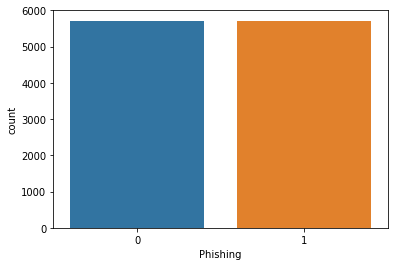

In [ ]:
# Checking the distribution of original dataset
sns.countplot(x=url['Phishing'])
print(url['Phishing'].value_counts())

In [ ]:
## Removing irrelevant columns (Columns with 0 and categorised as Phishing) that does not contribute to Phishing urls

# Replace 0 with NaN, filter for phishing emails, then remove columns with all 0s 
clean_df = url.replace(0, np.nan)
temp = clean_df[clean_df['Phishing']==1].isna().sum()
irrelevant = temp[temp==len(clean_df[clean_df['Phishing']==1].isna())].index

# Drop irrelavant columns 
url.drop(irrelevant, axis=1, inplace=True)


## Filter columns with nb* using regex 
# r = re.compile(r"^nb")
# nb_lst = list(filter(r.match, url_col))
# nb_df = pd.concat([url[nb_lst], url['Phishing']], axis=1)

google_index
page_rank
nb_www
ratio_digits_url
domain_in_title
nb_hyperlinks
phish_hints
domain_age
ip
nb_qm


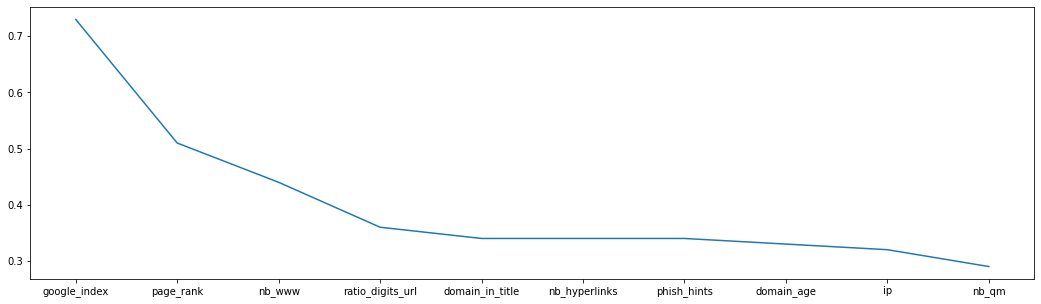

In [ ]:
## Visualising the top 10 most correlated variables to phishing emails 
corr_results = url.corr().abs().round(2)['Phishing'].sort_values(ascending=False).drop('Phishing')
for i in range(10):
  print(corr_results.index[i])
plt.figure(figsize=(18,5))
plt.plot(corr_results.head(10))

## 2.2 Principle Component Analysis (PCA) 

> **Purpose of PCA:** Outputs variables ordered by greatest influence on our target variable, Phishing (1 or 0).

Initially, we wanted to use 95% explained variance for our PCA but realized that it only reduced the dimensions to 60 components, which was still a large bulk of variables. Therefore, we decided to extract only the top 15 components from PCA to use as our model inputs.

In [ ]:
# Importing key libraries for PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Drop URL links & target status 
drop_list = ['url', 'Phishing']
features = list(url.drop(drop_list, axis=1).columns)

# Standardise the data 
x = url.loc[:, features].values
y = url.loc[:, 'Phishing'].values
scaled_x = StandardScaler().fit_transform(x)

In [ ]:
## Visualising result from PCA 

# Checking min no. of principal component to retain 95% of the variance 
pca = PCA(.95)   
pca.fit(scaled_x)
n = pca.n_components_

# PCA Projection to n dimension
pca_x = pca.fit_transform(scaled_x)
pca_names = ['PCA_{x}'.format(x=num) for num in range(1,n+1)]
pca_url = pd.DataFrame(data=pca_x, columns=pca_names)

# Consolidating target 'status' with PCA values 
final_url = pd.concat([pca_url, url['Phishing']], axis=1)

Total Explained Variance: 0.9507375248282591



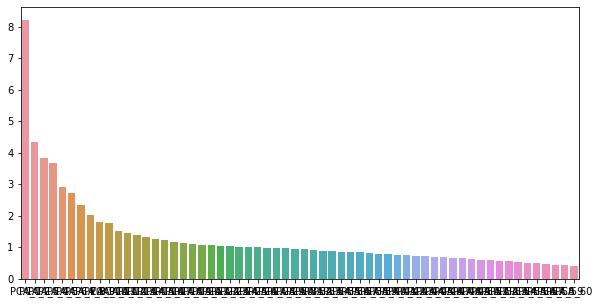

In [ ]:
## Explained Variance plot for 95% explained variance
f, axes = plt.subplots(1,1, figsize = (10, 5))

print("Total Explained Variance: {x}\n".format(x=pca.explained_variance_ratio_.sum()))
sns.barplot(x=pca_names, y=pca.explained_variance_)

In [ ]:
## Breakdown of each category of URL for the PCA components 
pca_breakdown = pd.DataFrame(abs(pca.components_), columns = features)
pca_breakdown.sum().sort_values(ascending=False).head(10)

shortening_service            6.349321
prefix_suffix                 6.115881
ratio_extRedirection          6.072711
domain_registration_length    6.072457
nb_hyperlinks                 5.974677
brand_in_path                 5.939374
domain_in_title               5.904642
domain_with_copyright         5.903010
nb_dslash                     5.815553
nb_extCSS                     5.809942
dtype: float64

In [ ]:
# Linear combination of variables to produce PCA components
pca_breakdown.head()

,length_url,length_hostname,ip,nb_dots,nb_hyphens,nb_at,nb_qm,nb_and,nb_eq,nb_underscore,...,empty_title,domain_in_title,domain_with_copyright,whois_registered_domain,domain_registration_length,domain_age,web_traffic,dns_record,google_index,page_rank
0,0.293846,0.104818,0.219282,0.221594,0.079319,0.082489,0.228651,0.242022,0.262993,0.167457,...,0.040953,0.078704,0.009519,0.033128,0.031578,0.046385,0.053301,0.070693,0.140449,0.098139
1,0.053422,0.096843,0.024720,0.124206,0.046975,0.004416,0.023244,0.100563,0.082288,0.117204,...,0.153824,0.163643,0.096024,0.026770,0.043614,0.075028,0.036031,0.064358,0.171561,0.114899
2,0.000081,0.082684,0.086653,0.072497,0.068650,0.044997,0.011701,0.024298,0.014441,0.053393,...,0.048803,0.035239,0.022062,0.001909,0.088674,0.148153,0.126812,0.026468,0.016715,0.212718
3,0.184920,0.004040,0.032759,0.042200,0.112866,0.021217,0.069044,0.057990,0.075589,0.057554,...,0.157217,0.121338,0.073917,0.196956,0.152237,0.233162,0.020470,0.248048,0.150321,0.250878
4,0.050576,0.279118,0.018880,0.083933,0.035010,0.061811,0.069135,0.148133,0.137380,0.080102,...,0.176971,0.098548,0.099056,0.053932,0.062979,0.010682,0.120884,0.074238,0.012608,0.074717


# 3. Model Building and Evaluation
<ul> 
  <li> The ML models that we have selected are as follows: 
    <ol>
      <li> Decision Tree </li>
      <li> RandomForestClassifier </li>
      <li> Logistic Regression/ Support Vector Machine </li> 
    </ol>
  </li> 
</ul>

## ROUND 1
<ul> 
  <li> For our first model building, we will be training the model with the top 15 PCA components, then evaluating the performance of all 3 models to see which model has the best performance.
  </li>

---

### 3.1 Decision Tree

In [ ]:
## Import relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score
from sklearn.model_selection import cross_val_score

In [ ]:
## Data Preparation (Model Building)
X = final_url.iloc[:,:-1]
y = final_url['Phishing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model Training 
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)


Model Evaluation (Decision Tree)
   Accuracy (in %): 90.41%
   Precision (in %): 90.39%
   F1-score (in %): 90.36
%


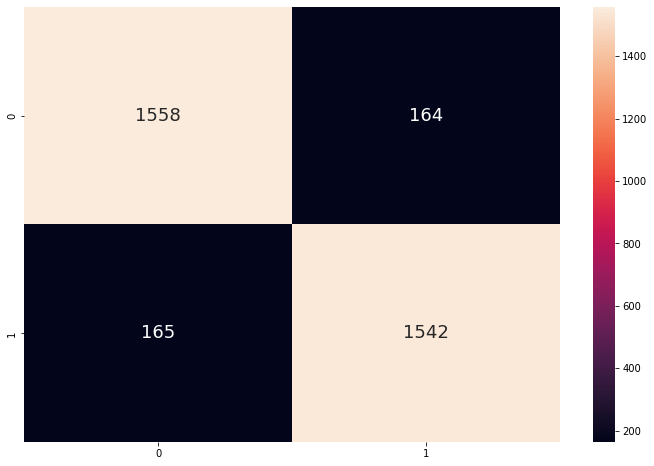

In [ ]:
## Model Evaluation 

# Confusion Matrix
f, axes = plt. subplots(1,1, figsize = (12, 8))
dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, annot = True, fmt = ".0f", annot_kws={'size' :18})

## Metrics Calculation
dt_acc_1 = accuracy_score(y_test, dt_pred)*100
dt_prec_1 = precision_score(y_test, dt_pred)*100
dt_f1score_1 = f1_score(y_test, dt_pred)*100

# Include precision & F1-score 
print("Model Evaluation (Decision Tree)")
print("   Accuracy (in %): {:.2f}%".format(dt_acc_1))
print("   Precision (in %): {:.2f}%".format(dt_prec_1))
print("   F1-score (in %): {:.2f}\n%".format(dt_f1score_1))

# Cross-validation 
scores=cross_val_score(dt, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

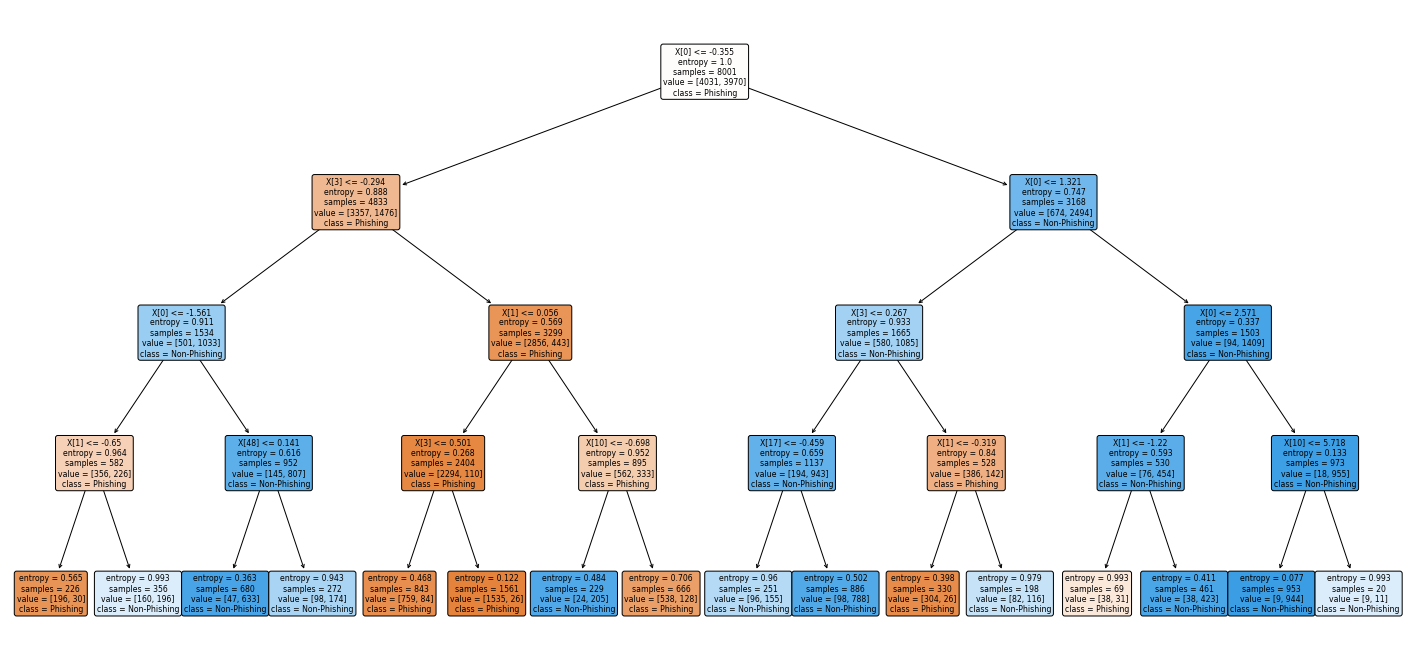

In [ ]:
# Plot the trained Decision Tree
f = plt.figure(figsize=(25,12))
plot_tree(dt, filled=True, rounded=True, 
          class_names=['Phishing', 'Non-Phishing'])

plt.show()

#### Improving on Decision Tree

In [ ]:
from sklearn.metrics import accuracy_score
print("Initial accuracy= {:.2f}%".format(100*accuracy_score(y_test, dt_pred)))

dtree = DecisionTreeClassifier(criterion='gini') 
dtree.fit(X_train, y_train)
dt_pred = dtree.predict(X_test)
print('Criterion = gini {:.2f}%'.format(100*accuracy_score(y_test, dt_pred)))

dtree = DecisionTreeClassifier(criterion='entropy') 
dtree.fit(X_train, y_train)
dt_pred = dtree.predict(X_test)
print('Criterion = entropy {:.2f}%'.format(100*accuracy_score(y_test, dt_pred)))


Initial accuracy= 86.64%
Criterion = gini 88.42%
Criterion = entropy 89.50%


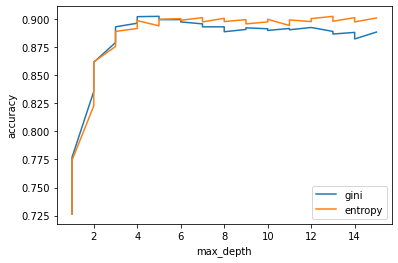

In [ ]:
max_depth =[]
acc_gini =[]
acc_entropy=[]
for i in range (1,30):
  dtree = DecisionTreeClassifier(criterion='gini', max_depth=i) 
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  acc_gini.append(accuracy_score(y_test, pred))
  max_depth.append(i)
#####
  dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i)
  dtree.fit(X_train, y_train)
  pred = dtree.predict(X_test)
  acc_entropy.append(accuracy_score(y_test, pred))
#####
  max_depth.append(i) 

d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})

# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()


In [ ]:
# Visualising max values
print("Max depth for highest entropy: {x}, {y}".format(x=acc_entropy.index(max(acc_entropy)), y=max(acc_entropy)))
print("Max depth for highest gini: {x}, {y}".format(x=acc_gini.index(max(acc_gini)), y=max(acc_gini)))

Max depth for highest entropy: 24, 0.9023038786818315
Max depth for highest gini: 8, 0.9023038786818315


In [ ]:
dtree = DecisionTreeClassifier(criterion= 'entropy', max_depth=4)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('New Accuracy= {:.2f}%'.format(100*(accuracy_score(y_test, pred)))) 

New Accuracy= 86.18%


In [ ]:
dtree = DecisionTreeClassifier(criterion= 'gini', max_depth=4)
dtree.fit(X_train, y_train)
pred = dtree.predict(X_test)
print('New Accuracy= {:.2f}%'.format(100*(accuracy_score(y_test, pred)))) 

New Accuracy= 86.15%


We deem the best parameters to be criterion=gini and max_depth =8

### 3.2 Random Forest 

In [ ]:
## Importing key libraries 
from sklearn.ensemble import RandomForestClassifier

In [ ]:
## Data Preparation (Model Building)
size = len(final_url.columns)-1
X = final_url.iloc[:,0:size]
y = final_url.iloc[:,size]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model Training 
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)


Model Evaluation (Random Forest)
   Accuracy (in %): 94.69%
   Precision (in %): 94.46%
   F1-score (in %): 94.84
%


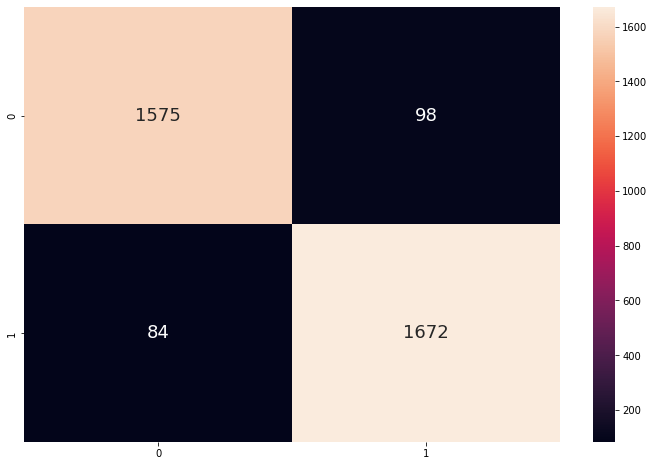

In [ ]:
## Model Evaluation 

# Confusion Matrix
f, axes = plt. subplots(1,1, figsize = (12, 8))
rfc_cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(rfc_cm, annot = True, fmt = ".0f", annot_kws={'size' :18})

## Metrics Calculation
rfc_acc_1 = accuracy_score(y_test, rfc_pred)*100
rfc_prec_1 = precision_score(y_test, rfc_pred)*100
rfc_f1score_1 = f1_score(y_test, rfc_pred)*100

# Include precision & F1-score 
print("Model Evaluation (Random Forest)")
print("   Accuracy (in %): {:.2f}%".format(rfc_acc_1))
print("   Precision (in %): {:.2f}%".format(rfc_prec_1))
print("   F1-score (in %): {:.2f}\n%".format(rfc_f1score_1))

# Cross-validation 
scores=cross_val_score(rfc, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

### 3.3 LogisticRegression and Support Vector Machine (SVM)
We conducted Logistics Regression to model the probability of the discrete dependent variable (Phishing) based on the given variables.
> Limitations of Logistics Regression: 
> - Constructs linear boundaries, which may not be the case.
> - Assumes that independent variables are linearly related to dependent variables.
<br> 

However, we realized that it resulted in poor classification accuracy and precision, and decided to try SVM to perform non-linear classification using kernel trick. 
> Purpose of Support Vector MAchine (SVM): Finds a hyperplane that best separates the two classes based on statistical approach.

In [ ]:
# Importing relevant libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, f1_score
from sklearn.preprocessing import MinMaxScaler

In [ ]:
# Normalizing data for LogisticsRegression/ SVM
scaler = MinMaxScaler()
n = scaler.fit_transform(final_url)
norm_url = pd.DataFrame(n, columns = final_url.columns)

# Train_test_split the data
X = norm_url.iloc[:, :-1]
y = norm_url['Phishing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
## Testing out Logistics Regression 
lm = LogisticRegression()
lm.fit(X_train, y_train)
lm_pred = lm.predict(X_test)

# Confusion Matrix
lm_cm = confusion_matrix(y_test, lm_pred)

# Metrics Calculation
lm_acc_1 = accuracy_score(y_test, lm_pred)*100
lm_prec_1 = precision_score(y_test, lm_pred)*100
lm_f1score_1 = f1_score(y_test, lm_pred)*100

# Cross-validation 
scores=cross_val_score(lm, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
## Testing out Support Vector Machine (SVM)
svm = SVC()
svm.fit(X_train, y_train)
svm_pred = svm.predict(X_test)

# Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_pred)

# Metrics Calculation
svm_acc_1 = accuracy_score(y_test, svm_pred)*100
svm_prec_1 = precision_score(y_test, svm_pred)*100
svm_f1score_1 = f1_score(y_test, svm_pred)*100

# Cross-validation 
scores=cross_val_score(svm, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

In [ ]:
# Model Evaluation (LM)
print("Model Evaluation (Logistic Regression)")
print("   Accuracy (in %): {:.2f}%".format(lm_acc_1))
print("   Precision (in %): {:.2f}%".format(lm_prec_1))
print("   F1-score (in %): {:.2f}%\n".format(lm_f1score_1))

# Model Evaluation (SVM)
print("Model Evaluation (Support Vector Machine)")
print("   Accuracy (in %): {:.2f}%".format(svm_acc_1))
print("   Precision (in %): {:.2f}%".format(svm_prec_1))
print("   F1-score (in %): {:.2f}%\n".format(svm_f1score_1))

Model Evaluation (Logistic Regression)
   Accuracy (in %): 93.53%
   Precision (in %): 93.94%
   F1-score (in %): 93.50%

Model Evaluation (Support Vector Machine)
   Accuracy (in %): 94.75%
   Precision (in %): 95.02%
   F1-score (in %): 94.74%



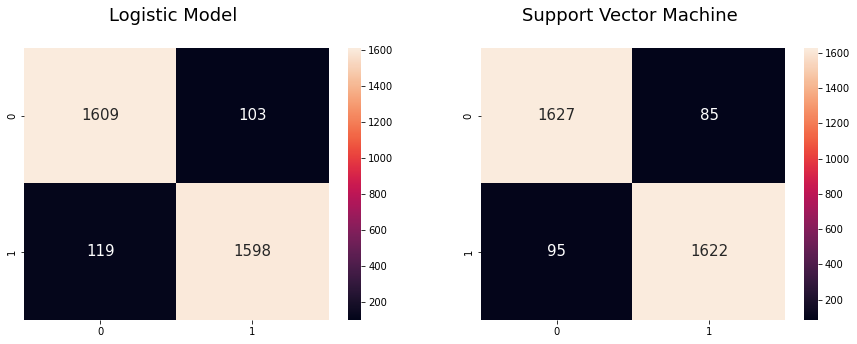

In [ ]:
# Visualising confusion matrices
f, axes = plt.subplots(1,2, figsize = (15, 5))
axes[0].axes.set_title("Logistic Model \n", fontsize=18)
axes[1].axes.set_title("Support Vector Machine \n", fontsize=18)
sns.heatmap(lm_cm, annot = True, fmt = ".0f", annot_kws={'size' :15}, ax=axes[0])
sns.heatmap(svm_cm, annot = True, fmt = ".0f", annot_kws={'size' :15}, ax=axes[1])
plt.show()

# 4. Improving Model Performance
<ul> 
  <li>We achieved good results from using PCA components as our model inputs, but there was still inaccuracies in the model's performance.
  </li>
  <li> We noticed that certain variables (i.e. google_index, page_rank) were correlated to phishing emails, therefore we sought to use Feature Selection from our original dataset and include them into our model inputs.
  </li>
</ul>

## Feature Selection 
<ul>
  <li> From our RandomForestClassifier model, we performed Feature Selection to rank variables based on feature importance, and we decided to add the top 5 features into our model inputs. We hypothesized that by adding these weights, we could achieve a better overall prediction accuracy and precision.
  </li> 
</ul> 

In [ ]:
## Performing RFC on original URL dataset 

# Data Preparation for URL dataset
features = list(url.drop(drop_list, axis=1).columns)
drop_list = ['url', 'Phishing']

X = url.loc[:, features].values
y = url.loc[:, 'Phishing'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model Training 
rfc_FI = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rfc_FI.fit(X_train, y_train)

RandomForestClassifier(n_estimators=500, n_jobs=-1)

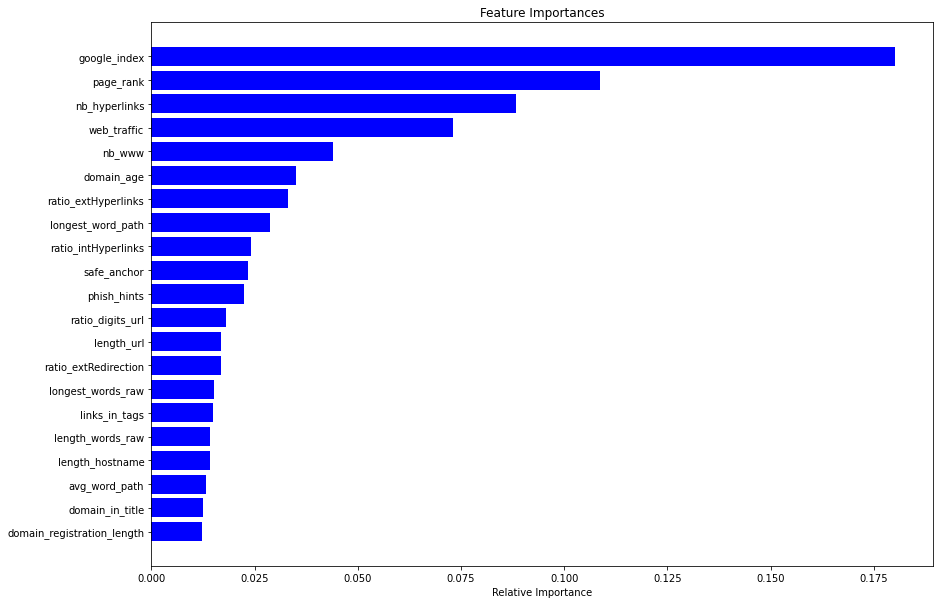

In [ ]:
# Selecting feature importance
importances = rfc_FI.feature_importances_
indices = np.argsort(importances)[60:81]
# indices = np.argsort(importances) ## Displays the feature importance for all variables

# Plotting horizontal barchart for top features 
plt.figure(figsize=(14,10))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### EDA for Feature Importance
Looking at the chart for Feature Importance, we decided to conduct EDA on the top 8 variables (Highest Influence on target variable).

In [ ]:
# View the top 8 variables of Feature Importance
fi = [features[i] for i in indices]
fi_result = []

for i in fi[:len(fi)-9:-1]:
  fi_result.append(i)
  print(i)

google_index
page_rank
nb_hyperlinks
web_traffic
nb_www
ratio_extHyperlinks
domain_age
ratio_intHyperlinks


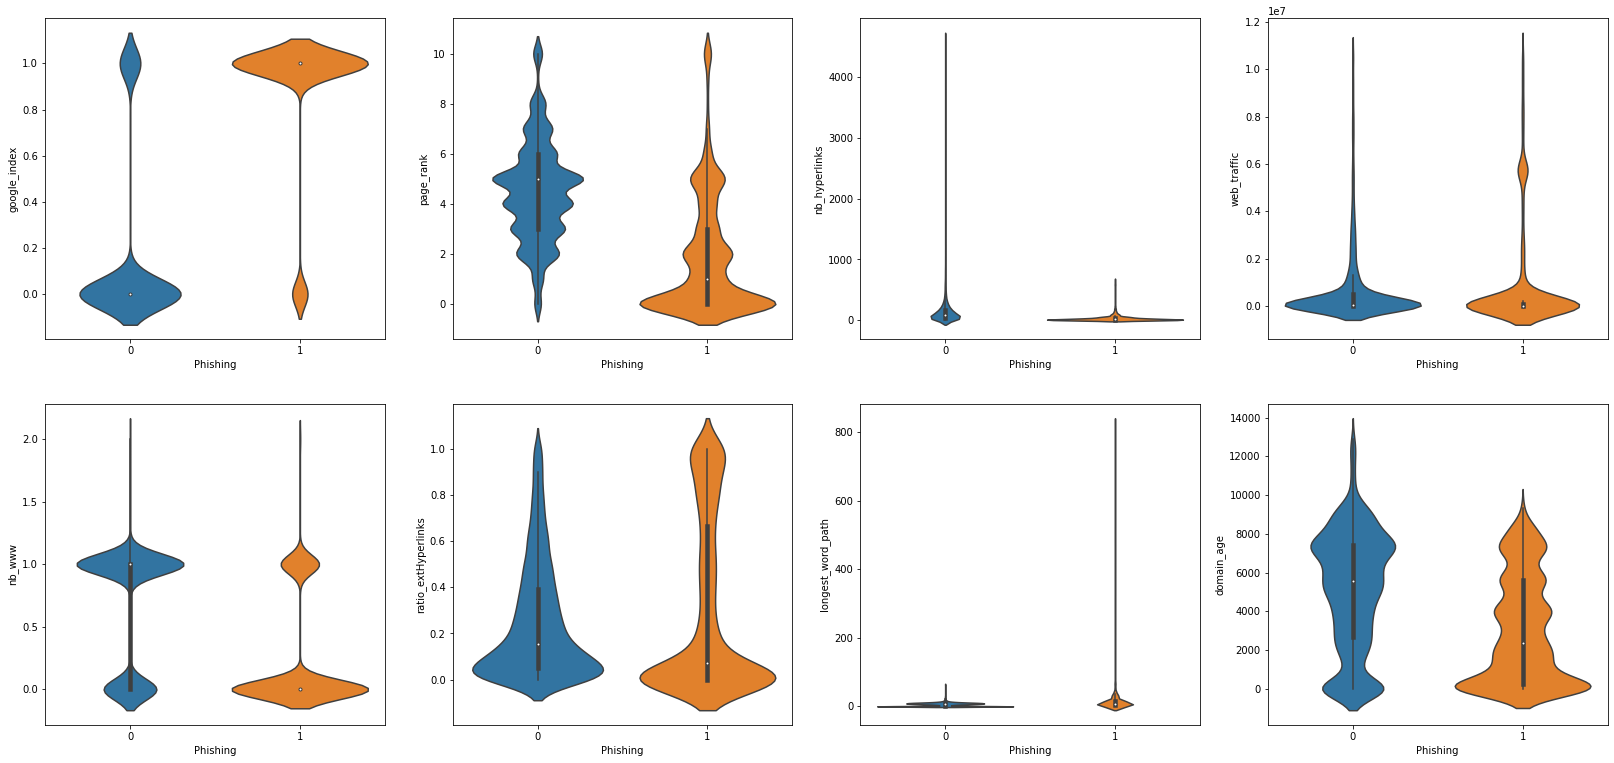

In [ ]:
## Visualising the top 8 selected variables from Feature Selection 

fig, axes = plt.subplots(2,4, figsize = (28,13))

sns.violinplot(x=url['Phishing'], y=url['google_index'], ax = axes[0,0])
sns.violinplot(x=url['Phishing'], y=url['page_rank'], ax = axes[0,1])
sns.violinplot(x=url['Phishing'], y=url['nb_hyperlinks'], ax = axes[0,2])
sns.violinplot(x=url['Phishing'], y=url['web_traffic'], ax = axes[0,3])

sns.violinplot(x=url['Phishing'], y=url['nb_www'], ax = axes[1,0])
sns.violinplot(x=url['Phishing'], y=url['ratio_extHyperlinks'], ax = axes[1,1])
sns.violinplot(x=url['Phishing'], y=url['longest_word_path'], ax = axes[1,2])
sns.violinplot(x=url['Phishing'], y=url['domain_age'], ax = axes[1,3])


### Data Preparation for Model Building
<ul> 
  <li> Based on our observation from EDA, we selected the following variables due to their distinct differences between Phishing and non-phishing emails, which could help in classifying our target variables. 
    <ol> 
      <li> google_index </li>
      <li> page_rank </li>
      <li> nb_www </li> 
    </ol>
  </li>
</ul> 

![picture](https://drive.google.com/uc?export=view&id=1Vw1nB5p_QlC-PYyNUTyUKSB9dwC0lSJj)
![picture](https://drive.google.com/uc?export=view&id=1rYrcx_59BRAdp4vlUlX7gsBldeOOCnhW)
![picture](https://drive.google.com/uc?export=view&id=1IOWHDAjUAzYmb74_7-QYKQqknrygUHc6)

Outputs: final_url_2 



In [ ]:
## Extracting relevant variables and joining to original final_url dataset
fi_variables = url[fi_result]
final_url_2 = final_url.join(fi_variables)
final_url_2.drop('Phishing', axis=1, inplace = True)
final_url_2['Phishing'] = final_url['Phishing']

## ROUND 2
<ul>
  <li> For our second model building, we included the variables from Feature Selection to test if we can obtain a better performance for our models.
  </li>
</ul>

---

### 4.1 Decision Tree

In [ ]:
## Data Preparation (Model Building)
X = final_url_2.iloc[:,:-1]
y = final_url_2['Phishing']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model Training 
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
dt_pred = dt.predict(X_test)

Model Evaluation (Decision Tree)
   Accuracy (in %): 91.78%
   Precision (in %): 91.32%
   F1-score (in %): 91.84
%


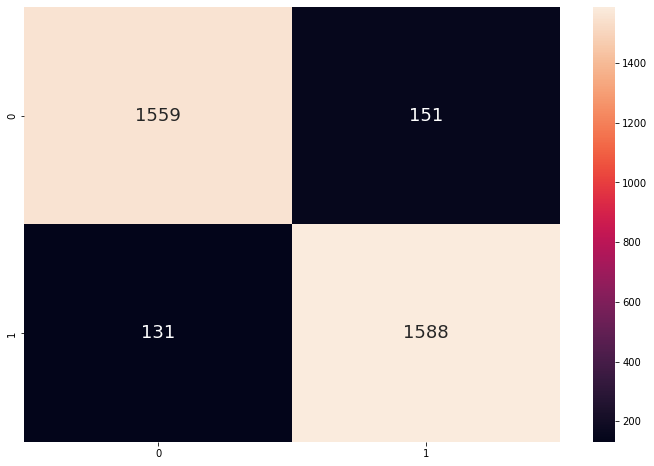

In [ ]:
## Model Evaluation 

# Confusion Matrix
f, axes = plt. subplots(1,1, figsize = (12, 8))
dt_cm = confusion_matrix(y_test, dt_pred)
sns.heatmap(dt_cm, annot = True, fmt = ".0f", annot_kws={'size' :18})

## Metrics Calculation
dt_acc_2 = accuracy_score(y_test, dt_pred)*100
dt_prec_2 = precision_score(y_test, dt_pred)*100
dt_f1score_2 = f1_score(y_test, dt_pred)*100

# Include precision & F1-score 
print("Model Evaluation (Decision Tree)")
print("   Accuracy (in %): {:.2f}%".format(dt_acc_2))
print("   Precision (in %): {:.2f}%".format(dt_prec_2))
print("   F1-score (in %): {:.2f}\n%".format(dt_f1score_2))

# Cross-validation 
scores=cross_val_score(dt, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

### 4.2 Random Forest

In [ ]:
## Data Preparation (Model Building)
size = len(final_url_2.columns)-1
X = final_url_2.iloc[:,0:size]
y = final_url_2.iloc[:,size]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Model Training 
rfc = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rfc.fit(X_train, y_train)
rfc_pred = rfc.predict(X_test)


Model Evaluation (Random Forest)
   Accuracy (in %): 96.30%
   Precision (in %): 96.34%
   F1-score (in %): 96.25
%


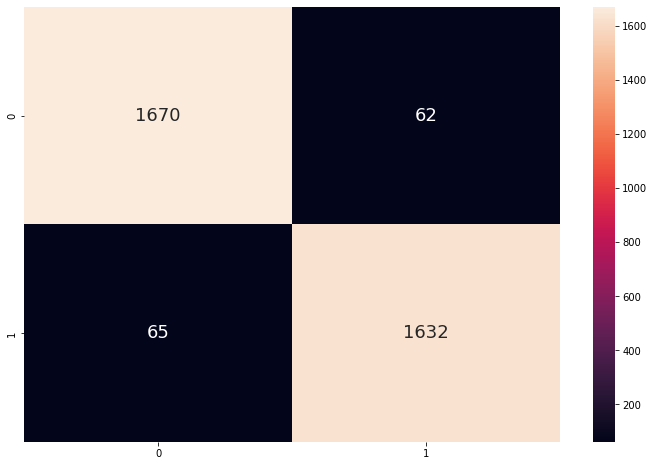

In [ ]:
## Model Evaluation 

# Confusion Matrix
f, axes = plt. subplots(1,1, figsize = (12, 8))
rfc_cm = confusion_matrix(y_test, rfc_pred)
sns.heatmap(rfc_cm, annot = True, fmt = ".0f", annot_kws={'size' :18})

## Metrics Calculation
rfc_acc_2 = accuracy_score(y_test, rfc_pred)*100
rfc_prec_2 = precision_score(y_test, rfc_pred)*100
rfc_f1score_2 = f1_score(y_test, rfc_pred)*100

# Include precision & F1-score 
print("Model Evaluation (Random Forest)")
print("   Accuracy (in %): {:.2f}%".format(rfc_acc_2))
print("   Precision (in %): {:.2f}%".format(rfc_prec_2))
print("   F1-score (in %): {:.2f}\n%".format(rfc_f1score_2))

# Cross-validation 
scores=cross_val_score(svm, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

### 4.3 Logistic Regression and Support Vector Machine (SVM)

In [ ]:
# Normalizing data for LogisticsRegression/ SVM
scaler = MinMaxScaler()
n = scaler.fit_transform(final_url_2)
norm_url = pd.DataFrame(n, columns = final_url_2.columns)

# Train_test_split the data
size = len(norm_url.columns)-1
X = norm_url.iloc[:, 0:size]
y = norm_url.iloc[:, size]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
## Testing out Logistics Regression 
lm = LogisticRegression()
lm.fit(X_train, y_train)
lm_pred = lm.predict(X_test)

# Confusion Matrix
lm_cm = confusion_matrix(y_test, lm_pred)

# Metrics Calculation
lm_acc_2 = accuracy_score(y_test, lm_pred)*100
lm_prec_2 = precision_score(y_test, lm_pred)*100
lm_f1score_2 = f1_score(y_test, lm_pred)*100

# ----------------------------------------------

## Testing out Support Vector Machine (SVM)
svc = SVC()
svc.fit(X_train, y_train)
svc_pred = svc.predict(X_test)

# Confusion Matrix
svc_cm = confusion_matrix(y_test, svc_pred)

# Metrics Calculation
svm_acc_2 = accuracy_score(y_test, svc_pred)*100
svm_prec_2 = precision_score(y_test, svc_pred)*100
svm_f1score_2 = f1_score(y_test, svc_pred)*100

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# Model Evaluation (LM)
print("Model Evaluation (Logistic Regression)")
print("   Accuracy (in %): {:.2f}%".format(lm_acc_2))
print("   Precision (in %): {:.2f}%".format(lm_prec_2))
print("   F1-score (in %): {:.2f}%\n".format(lm_f1score_2))

# Cross-validation 
scores=cross_val_score(lm, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

# Model Evaluation (SVM)
print("Model Evaluation (Support Vector Machine)")
print("   Accuracy (in %): {:.2f}%".format(svm_acc_2))
print("   Precision (in %): {:.2f}%".format(svm_prec_2))
print("   F1-score (in %): {:.2f}%\n".format(svm_f1score_2))

# Cross-validation 
scores=cross_val_score(svm, X, y, cv=5)
print("%0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Model Evaluation (Logistic Regression)
   Accuracy (in %): 92.65%
   Precision (in %): 92.68%
   F1-score (in %): 92.46%

Model Evaluation (Support Vector Machine)
   Accuracy (in %): 94.60%
   Precision (in %): 94.77%
   F1-score (in %): 94.46%



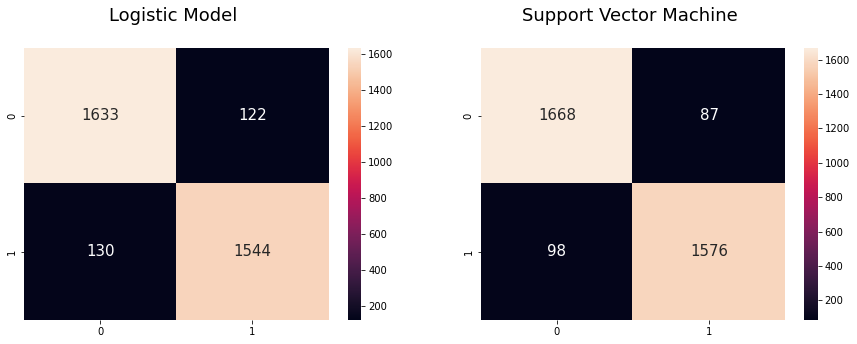

In [ ]:
# Visualising confusion matrices
f, axes = plt.subplots(1,2, figsize = (15, 5))
axes[0].axes.set_title("Logistic Model \n", fontsize=18)
axes[1].axes.set_title("Support Vector Machine \n", fontsize=18)
sns.heatmap(lm_cm, annot = True, fmt = ".0f", annot_kws={'size' :15}, ax=axes[0])
sns.heatmap(svc_cm, annot = True, fmt = ".0f", annot_kws={'size' :15}, ax=axes[1])
plt.show()

# 5. Model Comparison & Emsembling



## 5.1 Model Consolidation & Comparison
<ul> 
  <li> After running both rounds of model training for all 3 models, we consolidated the metrics into a dataframe for analysis.
  </li>
</ul>

**Deductions from consolidating results:**
<ul> 
  <li> Generally across all 3 models, the 2nd round of model training produced better model performances and prediction results.
  </li>
  <li> Support Vector Machine model produced the best result.
</ul>

In [ ]:
## Metrics Comparison 

metrics = ['Accuracy', 'Precision', 'F1-score']

# Logistic Regression
consolidated_metrics = [[ dt_acc_1, dt_prec_1, dt_f1score_1], [dt_acc_2, dt_prec_2, dt_f1score_2],
                        [ rfc_acc_1, rfc_prec_1, rfc_f1score_1], [rfc_acc_2, rfc_prec_2, rfc_f1score_2],
                        [ lm_acc_1, lm_prec_1, lm_f1score_1], [lm_acc_2, lm_prec_2, lm_f1score_2],
                        [ svm_acc_1, svm_prec_1, svm_f1score_1], [svm_acc_2, svm_prec_2, svm_f1score_2]]

# consolidated_metrics = np.transpose(consolidated_metrics)

tuples = [('Decision Tree', 'Round 1'), ('Decision Tree', 'Round 2'),
          ('Random Forest', 'Round 1'), ('Random Forest', 'Round 2'),
          ('Logistic Model', 'Round 1'), ('Logistic Model', 'Round 2'),
          ('Support Vector Machine', 'Round 1'), ('Support Vector Machine', 'Round 2')]

index = pd.MultiIndex.from_tuples(tuples, names=['Model', 'Round'])

comparison_results = pd.DataFrame(consolidated_metrics, index = index, columns=metrics)
comparison_results = np.transpose(comparison_results)

comparison_results

Model     Decision Tree            Random Forest            Logistic Model  \
Round           Round 1    Round 2       Round 1    Round 2        Round 1   
Accuracy      90.405366  91.776028     94.692330  96.296296      93.525809   
Precision     90.386870  91.316849     94.463277  96.340024      93.944738   
F1-score      90.360387  91.844997     94.838344  96.254792      93.504974   

Model                Support Vector Machine             
Round        Round 2                Round 1    Round 2  
Accuracy   92.650919              94.750656  94.604841  
Precision  92.677071              95.020504  94.768491  
F1-score   92.455090              94.742991  94.456098

## 5.2 Ensembling of ML Models 
<ul> 
  <li> We then sought to ensemble the 3 ML models using bagging method, where each model learns the error produced by the previous model using a slightly different subset of the training dataset. Bagging reduces variance and minimizes overfitting. 
  </li>
</ul> 

In [ ]:
from sklearn.model_selection import cross_val_score, KFold

# Model Class to be used for different ML algorithms
class ClassifierModel(object):
  def __init__(self, clf, params=None):
    self.clf = clf(**params)

  def train(self, x_train, y_train):
    self.clf.fit(x_train, y_train)
    
    def fit(self,x,y):
      return self.clf.fit(x,y)
    
    def feature_importances(self,x,y):
      return self.clf.fit(x,y).feature_importances_
    
    def predict(self, x):
      return self.clf.predict(x)

def trainModel(model, x_train, y_train, x_test, n_folds):
    cv = KFold(n_splits= n_folds)
    scores = cross_val_score(model.clf, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores

In [ ]:
# Normalizing data for LogisticsRegression/ SVM
scaler = MinMaxScaler()
n = scaler.fit_transform(final_url_2)
norm_url = pd.DataFrame(n, columns = final_url_2.columns)

# Train_test_split the data
size = len(norm_url.columns)-1
X = norm_url.iloc[:, 0:size]
y = norm_url.iloc[:, size]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
# Random Forest parameters
rf_params = {
    'n_estimators': 400,
    'max_depth': 5,
    'min_samples_leaf': 3,
    'max_features' : 'sqrt',
}
rfc_model = ClassifierModel(clf=RandomForestClassifier, params={})
rfc_scores = trainModel(rfc_model,X_train, y_train, X_test, 5)
rfc_scores.mean()

0.9516304653341662

In [ ]:
# Logistic Regression parameters
lm_model = ClassifierModel(clf=LogisticRegression, params={})
lm_scores = trainModel(lm_model,X_train, y_train, X_test, 5)
lm_scores.mean()

0.9190106964397252

In [ ]:
# Support Vector Machine 
svm_model = ClassifierModel(clf=SVC, params={})
svm_scores = trainModel(svm_model,X_train, y_train, X_test, 5)
svm_scores.mean()

0.9356331980012493

# 6. Conclusion
<ul>
  <li> At the end of this project, we managed to build a model with xx% classification accuracy through ensembling of the 3 given models. 
  </li>
  <li> We
</ul> 

<br> 

---

## Thank you!! 
Cheers to staying with us till the end & 
Creds to Goh Chen Yu, our lovely TA :D